# Imports

In [73]:
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,ConfusionMatrixDisplay
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn
from sklearn.neighbors import KNeighborsClassifier
from skimage.feature import hog

In [74]:
paths=[os.path.join("cropped_images",x)for x in os.listdir("cropped_images")]
paths

['cropped_images\\Charlize Theron',
 'cropped_images\\chris_evans',
 'cropped_images\\chris_hemsworth',
 'cropped_images\\Elizabeth Olsen',
 'cropped_images\\Henry Cavill',
 'cropped_images\\mark_ruffalo',
 'cropped_images\\Priyanka Chopra',
 'cropped_images\\robert_downey_jr',
 'cropped_images\\scarlett_johansson',
 'cropped_images\\Tom Cruise']

# EDA

In [75]:
os.listdir("cropped_images")

['Charlize Theron',
 'chris_evans',
 'chris_hemsworth',
 'Elizabeth Olsen',
 'Henry Cavill',
 'mark_ruffalo',
 'Priyanka Chopra',
 'robert_downey_jr',
 'scarlett_johansson',
 'Tom Cruise']

In [76]:
image=cv.imread("cropped_images/Charlize Theron/Charlize Theron_0.jpg")


In [77]:
cv.imshow("Test_image",image)
cv.waitKey(0)
cv.destroyAllWindows()

In [78]:
total_paths=[]
paths=[os.path.join("cropped_images",x)for x in os.listdir("cropped_images")]
for path in paths:
    total_paths.extend([os.path.join(path,x)for x in os.listdir(path)])
total_paths

['cropped_images\\Charlize Theron\\Charlize Theron_0.jpg',
 'cropped_images\\Charlize Theron\\Charlize Theron_1.jpg',
 'cropped_images\\Charlize Theron\\Charlize Theron_10.jpg',
 'cropped_images\\Charlize Theron\\Charlize Theron_11.jpg',
 'cropped_images\\Charlize Theron\\Charlize Theron_12.jpg',
 'cropped_images\\Charlize Theron\\Charlize Theron_13.jpg',
 'cropped_images\\Charlize Theron\\Charlize Theron_14.jpg',
 'cropped_images\\Charlize Theron\\Charlize Theron_15.jpg',
 'cropped_images\\Charlize Theron\\Charlize Theron_16.jpg',
 'cropped_images\\Charlize Theron\\Charlize Theron_17.jpg',
 'cropped_images\\Charlize Theron\\Charlize Theron_18.jpg',
 'cropped_images\\Charlize Theron\\Charlize Theron_19.jpg',
 'cropped_images\\Charlize Theron\\Charlize Theron_2.jpg',
 'cropped_images\\Charlize Theron\\Charlize Theron_20.jpg',
 'cropped_images\\Charlize Theron\\Charlize Theron_21.jpg',
 'cropped_images\\Charlize Theron\\Charlize Theron_22.jpg',
 'cropped_images\\Charlize Theron\\Charlize

# Preprocessing

In [79]:
target=[]
features=[]
for path in total_paths:
    target.append((os.path.split(path)[0].split("\\")[1]))
    image=cv.imread(path)
    image=cv.resize(image,(128,128))
    gray_image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    features.append(gray_image)
features = np.array(features, dtype=np.float32) / 255.0  
target=np.array(target)

In [80]:
def extract_hog_features(image):
    features, _ = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), orientations=9, visualize=True)  
    return features

In [81]:
features_hog = np.array([extract_hog_features(img) for img in features])

In [82]:
features_hog.shape

(504, 8100)

In [83]:
np.unique(target,return_counts=True)

(array(['Charlize Theron', 'Elizabeth Olsen', 'Henry Cavill',
        'Priyanka Chopra', 'Tom Cruise', 'chris_evans', 'chris_hemsworth',
        'mark_ruffalo', 'robert_downey_jr', 'scarlett_johansson'],
       dtype='<U18'),
 array([49, 49, 49, 49, 50, 50, 53, 50, 51, 54], dtype=int64))

In [84]:
x_train,x_test,y_train,y_test=train_test_split(features_hog,target,test_size=0.2,random_state=100)

In [85]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((403, 8100), (101, 8100), (403,), (101,))

In [86]:
np.unique(y_train,return_counts=True)

(array(['Charlize Theron', 'Elizabeth Olsen', 'Henry Cavill',
        'Priyanka Chopra', 'Tom Cruise', 'chris_evans', 'chris_hemsworth',
        'mark_ruffalo', 'robert_downey_jr', 'scarlett_johansson'],
       dtype='<U18'),
 array([36, 38, 41, 42, 38, 42, 46, 42, 42, 36], dtype=int64))

In [87]:
np.unique(y_test,return_counts=True)

(array(['Charlize Theron', 'Elizabeth Olsen', 'Henry Cavill',
        'Priyanka Chopra', 'Tom Cruise', 'chris_evans', 'chris_hemsworth',
        'mark_ruffalo', 'robert_downey_jr', 'scarlett_johansson'],
       dtype='<U18'),
 array([13, 11,  8,  7, 12,  8,  7,  8,  9, 18], dtype=int64))

In [88]:
np.unique(y_test).shape

(10,)

In [89]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [90]:
y_test,y_train

(array([8, 2, 5, 0, 3, 6, 9, 4, 9, 7, 1, 9, 0, 5, 8, 2, 1, 8, 6, 4, 8, 1,
        5, 9, 9, 4, 9, 9, 1, 3, 2, 3, 9, 2, 7, 0, 4, 9, 4, 0, 0, 6, 9, 3,
        7, 4, 1, 4, 4, 3, 5, 1, 5, 9, 4, 8, 3, 0, 9, 5, 1, 1, 2, 2, 9, 6,
        7, 4, 7, 8, 2, 8, 0, 0, 4, 0, 1, 1, 9, 7, 7, 0, 6, 4, 0, 6, 8, 9,
        3, 1, 2, 0, 5, 0, 6, 5, 9, 8, 7, 9, 9]),
 array([7, 6, 8, 6, 5, 8, 2, 2, 3, 8, 5, 6, 6, 0, 1, 5, 8, 3, 2, 8, 4, 2,
        6, 8, 4, 7, 0, 5, 8, 0, 3, 0, 1, 7, 7, 8, 4, 5, 0, 9, 6, 4, 1, 0,
        6, 2, 6, 3, 3, 9, 4, 5, 1, 1, 5, 3, 4, 6, 3, 2, 4, 1, 5, 0, 7, 4,
        1, 6, 2, 3, 3, 1, 5, 2, 1, 2, 8, 0, 9, 1, 8, 9, 0, 6, 1, 7, 6, 4,
        9, 8, 9, 2, 6, 0, 3, 8, 7, 2, 7, 3, 2, 6, 9, 0, 4, 5, 3, 7, 9, 3,
        1, 7, 0, 1, 0, 9, 3, 4, 5, 6, 5, 7, 3, 1, 7, 7, 8, 8, 9, 4, 2, 2,
        6, 6, 0, 6, 0, 9, 0, 3, 4, 3, 4, 2, 0, 7, 7, 7, 9, 9, 5, 3, 4, 9,
        8, 2, 1, 6, 8, 4, 8, 3, 7, 9, 0, 9, 6, 4, 5, 8, 4, 6, 3, 5, 2, 1,
        5, 6, 9, 1, 1, 3, 4, 8, 7, 6, 2, 6, 2, 2, 0, 5, 4, 3, 3

## PCA

In [91]:
pca= PCA(n_components=200,random_state=42).fit(x_train)

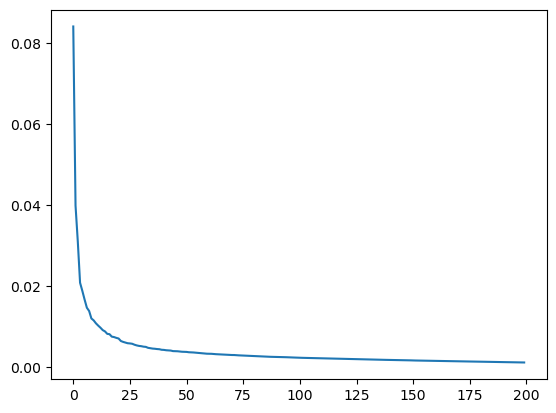

In [92]:
plt.plot(pca.explained_variance_ratio_)

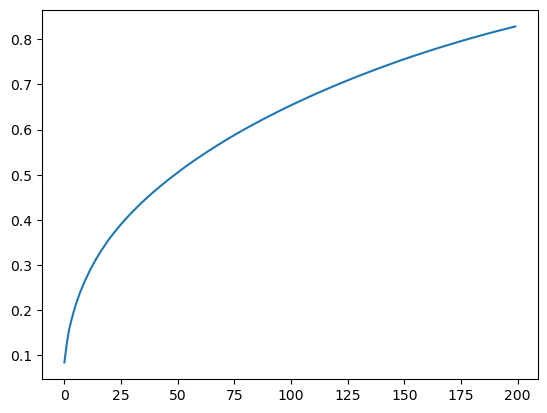

In [93]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [94]:
pca=PCA(n_components=50,random_state=42)
x_train_reduction=pca.fit_transform(x_train)
x_test_reduction=pca.transform(x_test)

In [95]:
x_train_reduction.shape

(403, 50)

In [96]:
svc =SVC(kernel="rbf",C=10,gamma="scale",class_weight="balanced")

In [97]:
param_grid = {
    'C': [0.1, 1, 10],  # Try different C values
    'gamma': ['scale', 'auto',],  # Test gamma values
    'kernel': ['rbf', 'sigmoid']  # Try different kernels
}

In [98]:
grid_search=GridSearchCV(svc,param_grid,cv=5,verbose=7,return_train_score=True)

In [99]:
grid_search.fit(x_train_reduction,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.323, test=0.284) total time=   0.0s
[CV 2/5] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.211, test=0.222) total time=   0.0s
[CV 3/5] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.227, test=0.222) total time=   0.0s
[CV 4/5] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.313, test=0.312) total time=   0.0s
[CV 5/5] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.319, test=0.325) total time=   0.0s
[CV 1/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=(train=0.602, test=0.506) total time=   0.0s
[CV 2/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=(train=0.571, test=0.494) total time=   0.0s
[CV 3/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=(train=0.655, test=0.593) total time=   0.0s
[CV 4/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=(train=0.563, test=0.575) total time=   0.0s
[CV 5/5] END C=0.1, gamma=scale, kernel=sigmoid;, 

GridSearchCV(cv=5, estimator=SVC(C=10, class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             return_train_score=True, verbose=7)

In [100]:
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [101]:
grid_search.best_score_

0.8512654320987654

In [102]:
estimator=grid_search.best_estimator_

In [103]:
prediction=estimator.predict(x_test_reduction)

In [104]:
prediction

array([8, 2, 8, 2, 3, 6, 9, 4, 9, 7, 1, 9, 0, 5, 8, 2, 1, 8, 6, 4, 8, 1,
       5, 9, 9, 4, 9, 9, 0, 3, 2, 3, 9, 2, 7, 0, 2, 9, 4, 0, 0, 6, 9, 3,
       7, 4, 1, 4, 4, 3, 5, 1, 5, 9, 4, 8, 3, 0, 9, 8, 1, 2, 2, 2, 9, 6,
       7, 4, 7, 8, 4, 7, 0, 1, 4, 0, 1, 1, 9, 7, 7, 0, 6, 4, 0, 6, 8, 9,
       3, 1, 2, 1, 5, 1, 6, 5, 9, 8, 7, 9, 9], dtype=int64)

In [105]:
accuracy_score(y_test,prediction)

0.8910891089108911

In [ ]:
cm=confusion_matrix(y_test,prediction)

<Axes: >

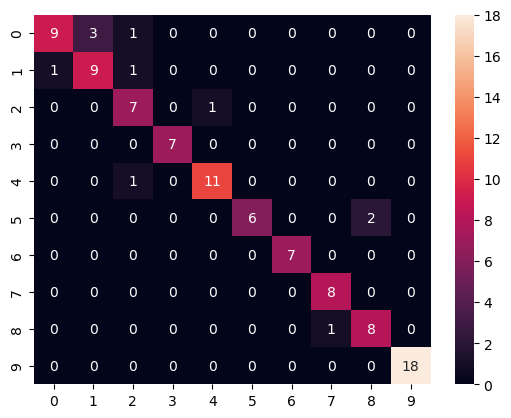

In [107]:
seaborn.heatmap(cm,annot=True)

In [108]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.75      0.82      0.78        11
           2       0.70      0.88      0.78         8
           3       1.00      1.00      1.00         7
           4       0.92      0.92      0.92        12
           5       1.00      0.75      0.86         8
           6       1.00      1.00      1.00         7
           7       0.89      1.00      0.94         8
           8       0.80      0.89      0.84         9
           9       1.00      1.00      1.00        18

    accuracy                           0.89       101
   macro avg       0.90      0.89      0.89       101
weighted avg       0.90      0.89      0.89       101



In [109]:
params = {
    "n_neighbors": [3, 5, 7,20],
    "weights": ["uniform", "distance"]
}


In [110]:
knn=KNeighborsClassifier()


In [111]:
grid_search=GridSearchCV(knn,params,cv=5,verbose=7,return_train_score=True)

In [112]:
grid_search.fit(x_train_reduction,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END n_neighbors=3, weights=uniform;, score=(train=0.894, test=0.765) total time=   0.0s
[CV 2/5] END n_neighbors=3, weights=uniform;, score=(train=0.901, test=0.827) total time=   0.0s
[CV 3/5] END n_neighbors=3, weights=uniform;, score=(train=0.901, test=0.691) total time=   0.0s
[CV 4/5] END n_neighbors=3, weights=uniform;, score=(train=0.873, test=0.762) total time=   0.0s
[CV 5/5] END n_neighbors=3, weights=uniform;, score=(train=0.867, test=0.762) total time=   0.0s
[CV 1/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.778) total time=   0.0s
[CV 2/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.815) total time=   0.0s
[CV 3/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.704) total time=   0.0s
[CV 4/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.800) total time=   0.0s
[CV 5/5] END n_neighbors=3, weights=distance;, score=(train=1.0

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 20],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, verbose=7)

In [113]:
grid_search.best_score_

0.7841049382716049

In [114]:
estimator=grid_search.best_estimator_


In [115]:
estimator.score(x_test_reduction,y_test)

0.7821782178217822

In [116]:
prediction=estimator.predict(x_test_reduction)

In [117]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.46      0.63        13
           1       0.56      0.82      0.67        11
           2       0.75      0.75      0.75         8
           3       1.00      0.86      0.92         7
           4       0.73      0.92      0.81        12
           5       1.00      0.25      0.40         8
           6       0.70      1.00      0.82         7
           7       0.62      1.00      0.76         8
           8       0.88      0.78      0.82         9
           9       1.00      0.94      0.97        18

    accuracy                           0.78       101
   macro avg       0.82      0.78      0.76       101
weighted avg       0.84      0.78      0.77       101



In [118]:
cm=confusion_matrix(y_test,prediction)

<Axes: >

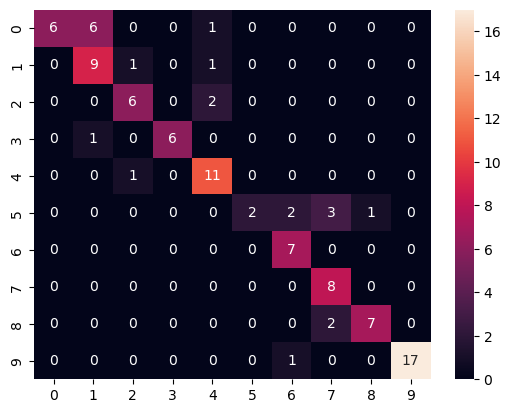

In [119]:
seaborn.heatmap(cm,annot=True)